In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/class 11/Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<Axes: xlabel='EstimatedSalary'>

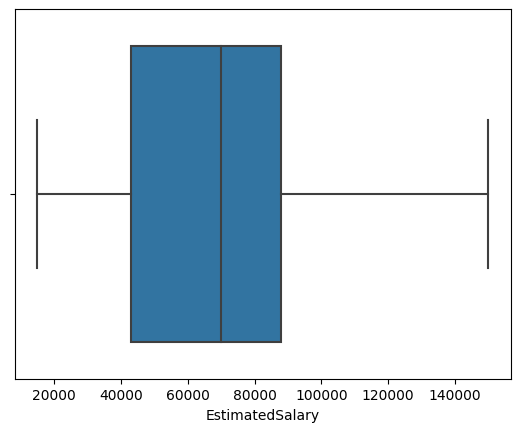

In [6]:
sns.boxplot(data=df,x='EstimatedSalary')

In [7]:
df['Purchased'].unique()

array([0, 1])

In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [10]:
x = df.drop(['Purchased'], axis=1)
y = df['Purchased']

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [13]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [14]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [15]:
rfc_pred = rfc.predict(x_test)

In [16]:
a = accuracy_score(rfc_pred,y_test)
print(a*100)

90.0


In [17]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.88      0.88      0.88        33

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



In [18]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
dtc_pred = dtc.predict(x_test)

In [20]:
b = accuracy_score(dtc_pred,y_test)
print(b*100)

78.75


In [21]:
print(classification_report(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        52
           1       0.67      0.79      0.72        28

    accuracy                           0.79        80
   macro avg       0.77      0.79      0.77        80
weighted avg       0.80      0.79      0.79        80



In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(x_test)

In [25]:
accuracy_score(y_pred,y_test)

0.5875

In [26]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        80
           1       0.00      0.00      0.00         0

    accuracy                           0.59        80
   macro avg       0.50      0.29      0.37        80
weighted avg       1.00      0.59      0.74        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


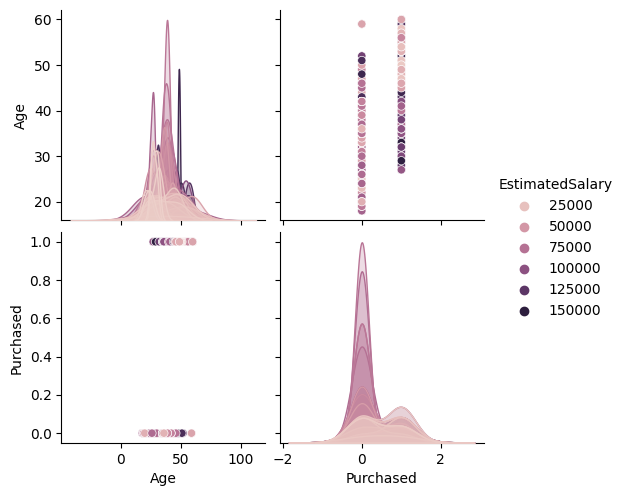

In [27]:
sns.pairplot(df,hue='EstimatedSalary')

In [28]:
df_yes = df[df['Purchased']==1]
df_no = df[df['Purchased']==0]

In [29]:
len(df_yes)

143

In [30]:
len(df_no)

257

In [31]:
from sklearn.utils import resample

In [32]:
df_yes_unsampled = resample(df_yes, replace=True, n_samples = (len(df_no)-len(df_yes)))
df_yes_unsampled.shape

(114, 3)

In [33]:
df_yes_new = pd.concat([df_yes,df_yes_unsampled])

In [34]:
df_yes_new.shape

(257, 3)

In [35]:
df_new = pd.concat([df_no,df_yes_new])

In [36]:
df_new.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [37]:
x = df_new.drop(['Purchased'], axis=1)
y = df_new['Purchased']

In [38]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [41]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
dtc_pred = dtc.predict(x_test)

In [43]:
accuracy_score(dtc_pred,y_test)

0.8914728682170543

In [44]:
print(classification_report(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        56
           1       0.93      0.88      0.90        73

    accuracy                           0.89       129
   macro avg       0.89      0.89      0.89       129
weighted avg       0.89      0.89      0.89       129



In [45]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
rfc_pred = rfc.predict(x_test)

In [47]:
accuracy_score(rfc_pred,y_test)

0.9069767441860465

In [48]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        56
           1       0.94      0.89      0.92        73

    accuracy                           0.91       129
   macro avg       0.90      0.91      0.91       129
weighted avg       0.91      0.91      0.91       129



In [49]:
lr.fit(x_train,y_train)

LogisticRegression()

In [50]:
lr_pred=lr.predict(x_test)

In [51]:
accuracy_score(lr_pred,y_test)

0.5348837209302325

In [52]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.70       129

    accuracy                           0.53       129
   macro avg       0.50      0.27      0.35       129
weighted avg       1.00      0.53      0.70       129



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
param_grid = {'n_estimators' : [10,20,30,40,100],
             'criterion' : ['gini','entropy','log_loss'],
             'max_depth' : [2,3,4,5,None]}

grid_rfc = GridSearchCV(rfc, param_grid = param_grid, verbose=2, cv=5)

In [54]:
grid_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END .......criterion=gini, max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......criterion=gini, max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......criterion=gini, max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, n_estimators=10; total time=   0.1s
[CV] END .......criterion=gini, max_depth=2, n_estimators=10; total time=   0.2s
[CV] END .......criterion=gini, max_depth=2, n_estimators=20; total time=   0.2s
[CV] END .......criterion=gini, max_depth=2, n_estimators=20; total time=   0.2s
[CV] END .......criterion=gini, max_depth=2, n_estimators=20; total time=   0.1s
[CV] END .......criterion=gini, max_depth=2, n_estimators=20; total time=   0.1s
[CV] END .......criterion=gini, max_depth=2, n_estimators=20; total time=   0.2s
[CV] END .......criterion=gini, max_depth=2, n_estimators=30; total time=   0.3s
[CV] END .......criterion=gini, max_depth=2, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, None],
                         'n_estimators': [10, 20, 30, 40, 100]},
             verbose=2)

In [55]:
grid_rfc.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 20}

In [56]:
grid_rfc.best_score_

0.9272727272727274

In [57]:
y_pred_grid = grid_rfc.predict(x_test)

In [58]:
print(classification_report(y_pred_grid,y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        58
           1       0.93      0.90      0.91        71

    accuracy                           0.91       129
   macro avg       0.91      0.91      0.91       129
weighted avg       0.91      0.91      0.91       129

